In [16]:
import csv
import subprocess
import os 
import pandas as pd
import io 
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# ipath = 'D:/vitaldb/first_filtered/ORC2_210907_112029.vital'
ipath = 'D:/Dropbox/2. WORK/SNUH/vitaldb/first_filtered/ORC2_210907_112029.vital'
interval = 1
p = subprocess.Popen('vital_recs.exe -h "{}" {}'.format(ipath, interval), stdout=subprocess.PIPE)
output = p.communicate()[0].decode("utf-8")

# p = subprocess.Popen(cmd, stdout=subprocess.PIPE)
# df = pd.read_csv(io.StringIO(p.stdout.read().decode('utf-8')), comment='#')
# for idx, val in df.iterrows():
#     print(idx)
colums = []
data = [] 
# df = pd.DataFrame()
for idx, row in enumerate(csv.reader(output.splitlines())):
    
    if idx == 0:
        colums.extend(row) 
    else:
        data.append(row)
    
df = pd.DataFrame(data, columns=colums)
df    
# colums

,Time,PLETH_SAT_O2,PLETH_HR,PLETH_PERF_REL,ECG_HR,ECG_II,PLETH,PLETH,CO2,AWP,...,PI,PAMB_MBAR,VENT_LEAK,ST_II,SPO2,BPM,NIBP_SYS,NIBP_DIA,NIBP_MEAN,PVI
0,0.000000,,,,,,,,0.000000,2.010000,...,,,,,,,,,,
1,1.000000,,,,,,,,0.000000,2.000000,...,,,,,,,,,,
2,2.000000,,,,,0.015001,62.759464,,0.000000,1.990000,...,,,,,,,,,,
3,3.000000,,,,,-0.059999,70.525032,0.000000,0.000000,2.000000,...,,,,,,,,,,
4,4.000000,100.000000,72.000000,2.000000,66.000000,0.045001,29.621490,0.000000,0.000000,2.000000,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,1610.000000,,,,,-0.004999,50.012211,0.000000,0.000000,2.000000,...,0.000000,985.000000,15.000000,,,,177.000000,116.000000,133.000000,
1611,1611.000000,,,,,-0.004999,50.012211,0.000000,0.000000,2.000000,...,0.000000,,,,,,177.000000,116.000000,133.000000,
1612,1612.000000,,,,,,,0.000000,0.000000,2.000000,...,0.000000,,,,,,177.000000,116.000000,133.000000,
1613,1613.000000,,,,,,,0.000000,0.000000,2.000000,...,0.000000,,,,,,,,,


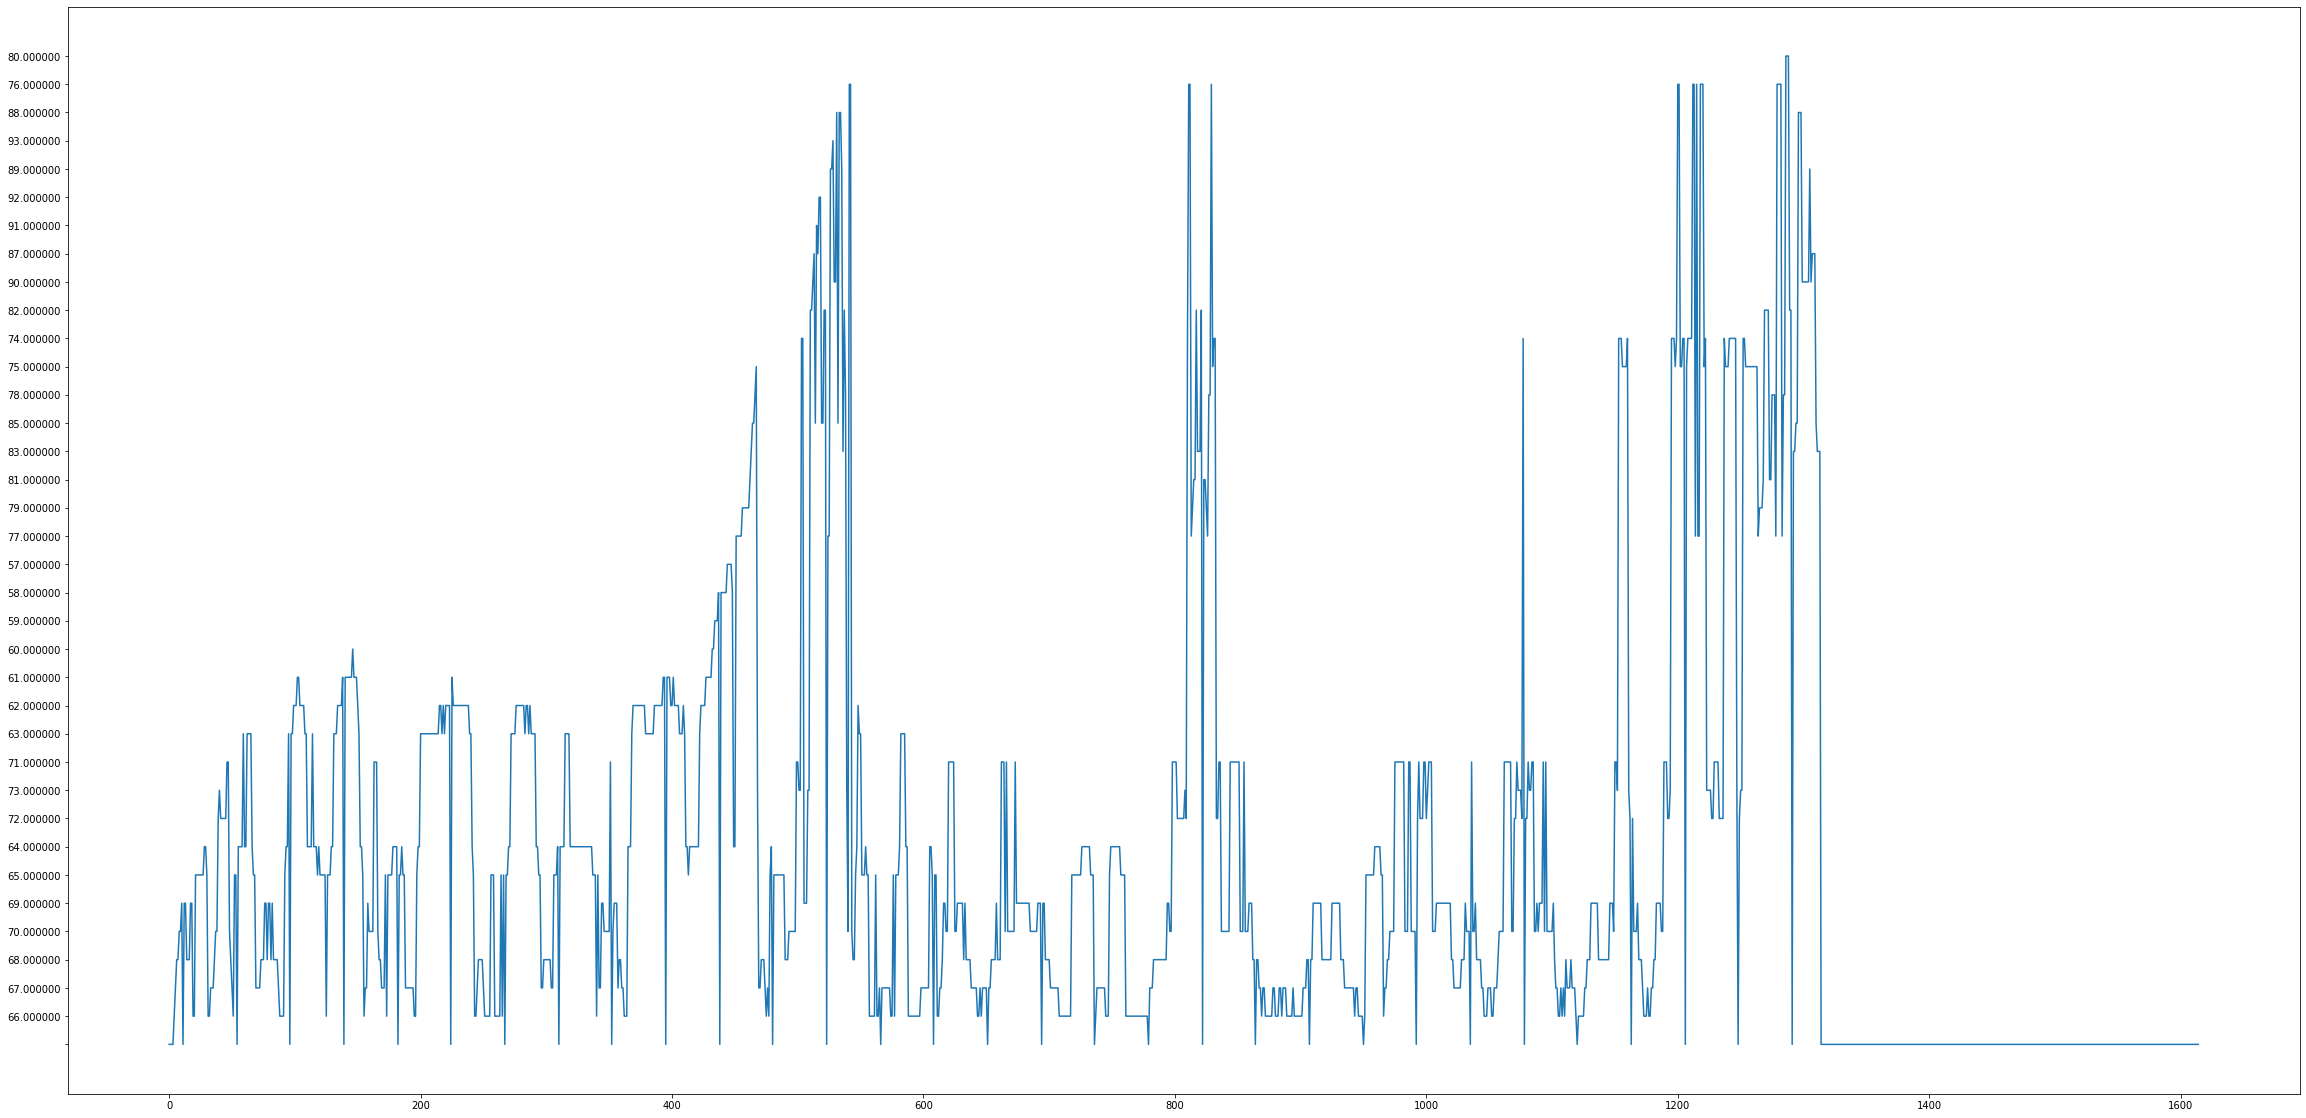

In [13]:
# df.head() 
# len(df['ECG_HR'])
plt.figure(figsize=(40, 20))
plt.plot(df['ECG_HR'])

In [15]:
# df.shape
# df.loc[:300, 'ECG_HR']
sample_df = df.loc[:300, ['Time', 'ECG_HR']]


In [19]:
sample_df.iloc[:10, 0]

0    0.000000
1    1.000000
2    2.000000
3    3.000000
4    4.000000
5    5.000000
6    6.000000
7    7.000000
8    8.000000
9    9.000000
Name: Time, dtype: object

In [20]:
def split_xy(dataset, timesteps, y_column):
    x, y = list(), list() 
    
    for i in range(len(dataset)):
        x_end_number = i + timesteps
        y_end_number = x_end_number + y_column
        
        if y_end_number > len(dataset):
            break 
        
        tmp_x = dataset.iloc[i:x_end_number, 0]
        tmp_y = dataset.iloc[x_end_number:y_end_number, 1]
        
        x.append(tmp_x)
        y.append(tmp_y)
        
    return np.array(x), np.array(y)
        
x, y = split_xy(sample_df, 10, 5)

x, y


(array([['0.000000', '1.000000', '2.000000', ..., '7.000000', '8.000000',
         '9.000000'],
        ['1.000000', '2.000000', '3.000000', ..., '8.000000', '9.000000',
         '10.000000'],
        ['2.000000', '3.000000', '4.000000', ..., '9.000000', '10.000000',
         '11.000000'],
        ...,
        ['284.000000', '285.000000', '286.000000', ..., '291.000000',
         '292.000000', '293.000000'],
        ['285.000000', '286.000000', '287.000000', ..., '292.000000',
         '293.000000', '294.000000'],
        ['286.000000', '287.000000', '288.000000', ..., '293.000000',
         '294.000000', '295.000000']], dtype=object),
 array([['69.000000', '', '69.000000', '69.000000', '68.000000'],
        ['', '69.000000', '69.000000', '68.000000', '68.000000'],
        ['69.000000', '69.000000', '68.000000', '68.000000', '68.000000'],
        ...,
        ['65.000000', '65.000000', '67.000000', '67.000000', '68.000000'],
        ['65.000000', '67.000000', '67.000000', '68.000000', 

In [21]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=1, test_size=0.3
)

In [22]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((200, 10), (200, 5), (87, 10), (87, 5))

In [23]:
# x_train = np.reshape(x_train, ())
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled, x_test_scaled

(array([[ 1.5671194 ,  1.5671194 ,  1.5671194 , ...,  1.5671194 ,
          1.5671194 ,  1.5671194 ],
        [ 1.02677481,  1.02677481,  1.02677481, ...,  1.02677481,
          1.02677481,  1.02677481],
        [ 0.2342694 ,  0.2342694 ,  0.2342694 , ...,  0.2342694 ,
          0.2342694 ,  0.2342694 ],
        ...,
        [-0.83441213, -0.83441213, -0.83441213, ..., -0.83441213,
         -0.83441213, -0.83441213],
        [ 1.12283607,  1.12283607,  1.12283607, ...,  1.12283607,
          1.12283607,  1.12283607],
        [-1.25468015, -1.25468015, -1.25468015, ..., -1.25468015,
         -1.25468015, -1.25468015]]),
 array([[ 1.47105814,  1.47105814,  1.47105814,  1.47105814,  1.47105814,
          1.47105814,  1.47105814,  1.47105814,  1.47105814,  1.47105814],
        [ 1.2549203 ,  1.2549203 ,  1.2549203 ,  1.2549203 ,  1.2549203 ,
          1.2549203 ,  1.2549203 ,  1.2549203 ,  1.2549203 ,  1.2549203 ],
        [ 0.52245318,  0.52245318,  0.52245318,  0.52245318,  0.52245318,
 

In [25]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_shape=(10, )))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [27]:
from keras.callbacks import EarlyStopping

model.compile(loss='mse', optimizer='adam', metrics=['mse'])

early_stopping = EarlyStopping(patience=20) 
model.fit(x_train_scaled, 
          y_train, 
          validation_split=0.2,
          verbose=1, 
          batch_size=1, 
          epochs=100, 
          callbacks=[early_stopping])

Epoch 1/100


UnimplementedError: Graph execution error:

Detected at node 'mean_squared_error/Cast' defined at (most recent call last):
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\krsty\AppData\Local\Temp/ipykernel_6572/385295072.py", line 6, in <module>
      model.fit(x_train_scaled,
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 1328, in mean_squared_error
      y_true = tf.cast(y_true, y_pred.dtype)
Node: 'mean_squared_error/Cast'
Cast string to float is not supported
	 [[{{node mean_squared_error/Cast}}]] [Op:__inference_train_function_926]

In [29]:
x_train_scaled

array([[ 1.5671194 ,  1.5671194 ,  1.5671194 , ...,  1.5671194 ,
         1.5671194 ,  1.5671194 ],
       [ 1.02677481,  1.02677481,  1.02677481, ...,  1.02677481,
         1.02677481,  1.02677481],
       [ 0.2342694 ,  0.2342694 ,  0.2342694 , ...,  0.2342694 ,
         0.2342694 ,  0.2342694 ],
       ...,
       [-0.83441213, -0.83441213, -0.83441213, ..., -0.83441213,
        -0.83441213, -0.83441213],
       [ 1.12283607,  1.12283607,  1.12283607, ...,  1.12283607,
         1.12283607,  1.12283607],
       [-1.25468015, -1.25468015, -1.25468015, ..., -1.25468015,
        -1.25468015, -1.25468015]])

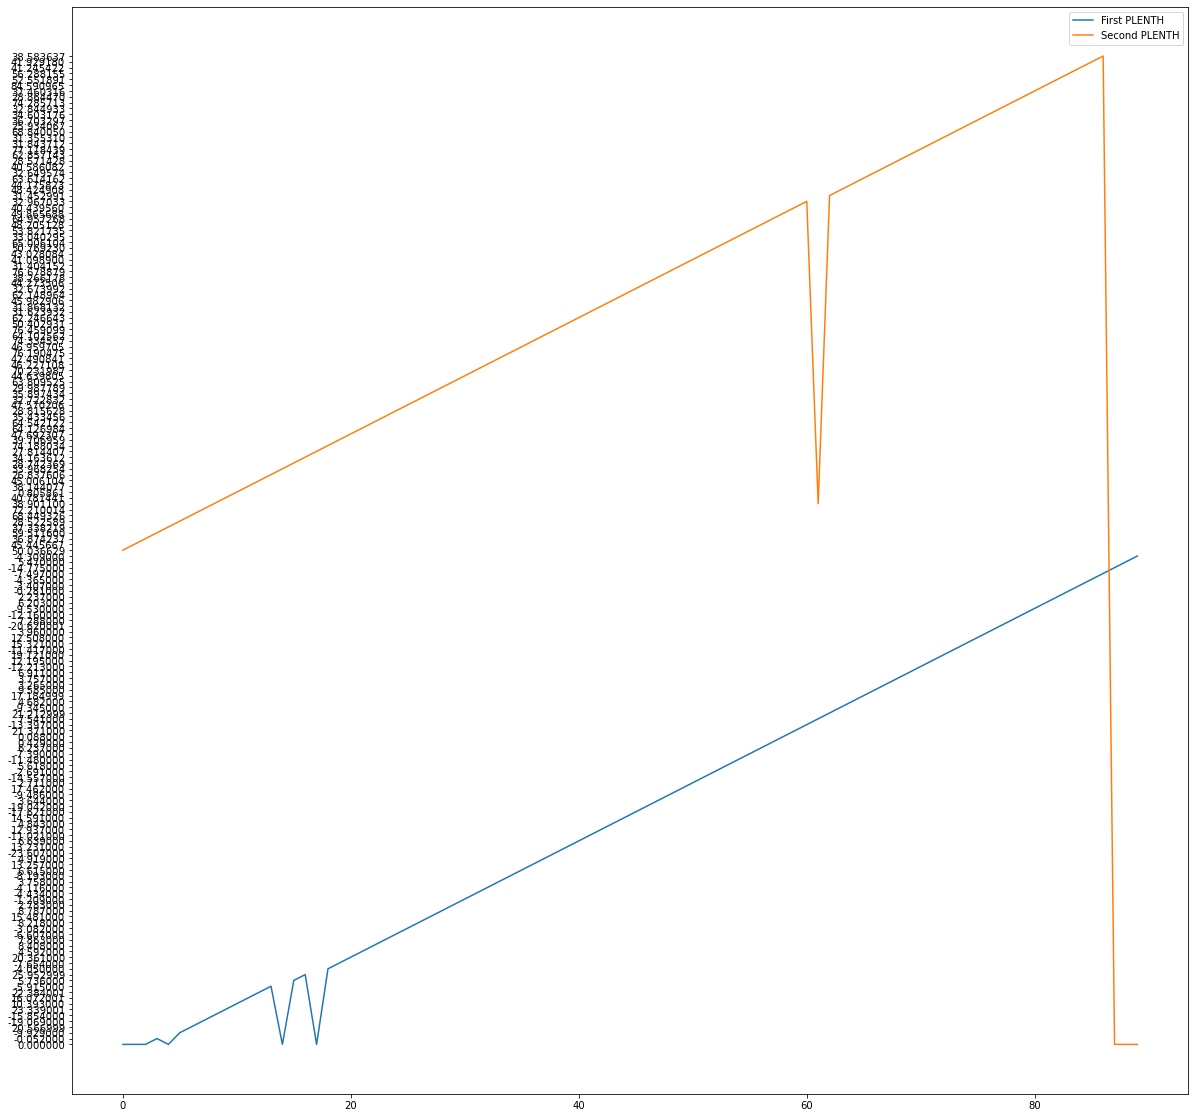

In [12]:
plt.figure(figsize=(20, 20))
plt.plot(df.iloc[:, 1], label='First PLENTH')
plt.plot(df.iloc[:, 3], label='Second PLENTH')
plt.legend()
plt.show()

<AxesSubplot:>

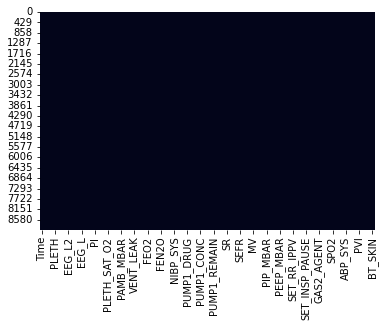

In [3]:
# df.isnull()
import seaborn as sns 

sns.heatmap(df.isnull(), cbar=False)

In [41]:
df[df['ECG_II'] == ''], df[df['CO2'] == '']

(             Time       PLETH ECG_II     PLETH        CO2      EEG_L1  \
 490    490.000000   -9.495000                    1.200000  -31.250000   
 4092  4092.000000  -10.176000                   36.099998   10.416667   
 7694  7694.000000   -7.336000                   31.500000  -14.583333   
 8700  8700.000000  -14.775000         0.000000   0.000000    2.083333   
 8701  8701.000000   32.768002         0.000000   0.000000    2.083333   
 ...           ...         ...    ...       ...        ...         ...   
 8984  8984.000000   -0.399000         0.000000   0.000000    2.083333   
 8985  8985.000000    1.347000         0.000000   0.000000    2.083333   
 8986  8986.000000    1.776000         0.000000               2.083333   
 8987  8987.000000    5.395000                                2.083333   
 8988  8988.000000    3.708000                                           
 
           EEG_L2      EEG_R1      EEG_R2       EEG_L  ...        SPO2  \
 490   -35.416668  -22.916666  -43.7

In [21]:
type(df.loc[0, 'Time'])

numpy.float64

In [24]:
df = df.fillna(0)

In [41]:
# pd.save_csv(df)
# df.save
df.to_csv('test.csv')

In [45]:
# rootdir = r"//Vitalnew/vital_data/Monthly_Confirmed/SNUH_OR"
rootdir = r'D:/first_filtered/'

for dir, dirs, files in os.walk(rootdir):
    
    for file in files[:10]:
        ipath = '{}/{}'.format(dir, file)
        cmd = 'vital_trks {}'.format(ipath)
        p = subprocess.Popen(cmd, stdout=subprocess.PIPE)
        df = pd.read_csv(io.StringIO(p.stdout.read().decode('utf-8')), comment='#')

        devs = []
        for index, row in df.iterrows():
            if row['tname'] != 'SVV':
                continue

            devs.append(row['dname'])


        if not devs:
            continue
        
        if type(devs) == 'float':
            print(devs)
        # print(devs)
        # print('{},{}'.format(ipath[len(rootdir)+1:], ','.join(devs)))

In [18]:
# devs
df.describe()

,Time,PLETH,ECG_II,PLETH,CO2,EEG_L1,EEG_L2,EEG_R1,EEG_R2,EEG_L,...,SPO2,BPM,ABP,ABP_SYS,ABP_DIA,HR,PVI,SET_FLOW_TRIG,PPV,BT_SKIN
count,8989,8989,8989,8989,8989,8989,8989,8989,8989,8989,...,8989,8989,8989,8989,8989,8989,8989,8989,8989,8989
unique,8989,7608,336,2322,421,124,160,159,140,86,...,7,44,1142,57,47,64,31,2,21,197
top,0.000000,0.000000,-0.044999,0.000000,0.000000,2.083333,2.083333,2.083333,2.083333,0.000000,...,99.000000,,,,,,,,,
freq,1,612,350,270,745,1490,1192,1490,1190,1716,...,5517,1119,732,1410,1410,1435,1544,7128,2124,4302
